In [1]:
import os
from util import *
from logistic_np import *
from keras.models import Model, Sequential, load_model
from keras.layers import Dense,InputLayer, LeakyReLU, BatchNormalization, Input
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from matplotlib import pyplot as plt
from keras.utils import plot_model
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [2]:
X_train, y_train, x_val, y_val, X_test, y_test = get_mnist_data()

Reading fashion MNIST data...
<class 'numpy.ndarray'>
Done reading
train_x shape: (2500, 784)
train_y shape: (2500,)
val_x shape: (500, 784)
val_y shape: (500,)
test_x shape: (500, 784)
test_y shape: (500,)


In [4]:
# Preprocess data
X_train, X_test = normalize_all_pixel(X_train,X_test)
encoder_dim = X_train.shape[1]//2
print(X_train.shape)

(2500, 784)


In [5]:
# Define encoder and decoder dimensions
encoder_dim = X_train.shape[1] // 2

In [6]:
# Define Encoder model
Encoder = Sequential([
    InputLayer(input_shape=X_train.shape[1:]),
    Dense(encoder_dim),
    BatchNormalization(),
    LeakyReLU(),
    Dense(encoder_dim),
    Dense(encoder_dim // 2)
], name="Encoder")

In [8]:
# Define Decoder model
Decoder = Sequential([
    InputLayer(input_shape=(encoder_dim // 2,)),
    Dense(encoder_dim),
    BatchNormalization(),
    LeakyReLU(),
    Dense(encoder_dim),
    Dense(X_train.shape[1])
], name="Decoder")

In [9]:
# Combine Encoder and Decoder to form Autoencoder model
inp = Input(X_train.shape[1:])
Encoderoutput = Encoder(inp)
Decoderoutput = Decoder(Encoderoutput)
AutoEncodermodel = Model(inputs=inp, outputs=Decoderoutput)

In [10]:
# Compile Autoencoder model
AutoEncodermodel.compile(optimizer="adam", loss="mse")

In [11]:
# Train Autoencoder model
callback = EarlyStopping(monitor='val_loss', patience=3)
hist = AutoEncodermodel.fit(X_train, X_train, epochs=100, validation_data=(X_test, X_test), callbacks=[callback])


Epoch 1/100
79/79 [==============================] - 2s 12ms/step - loss: 0.3317 - val_loss: 0.4131
Epoch 2/100
79/79 [==============================] - 1s 9ms/step - loss: 0.2124 - val_loss: 0.2037
Epoch 3/100
79/79 [==============================] - 1s 9ms/step - loss: 0.1918 - val_loss: 0.1684
Epoch 4/100
79/79 [==============================] - 1s 10ms/step - loss: 0.1688 - val_loss: 0.1590
Epoch 5/100
79/79 [==============================] - 1s 9ms/step - loss: 0.1576 - val_loss: 0.1419
Epoch 6/100
79/79 [==============================] - 1s 8ms/step - loss: 0.1510 - val_loss: 0.1404
Epoch 7/100
79/79 [==============================] - 0s 6ms/step - loss: 0.1461 - val_loss: 0.1409
Epoch 8/100
79/79 [==============================] - 1s 7ms/step - loss: 0.1386 - val_loss: 0.1496
Epoch 9/100
79/79 [==============================] - 1s 9ms/step - loss: 0.1407 - val_loss: 0.1217
Epoch 10/100
79/79 [==============================] - 1s 9ms/step - loss: 0.1283 - val_loss: 0.1195
Epoch 1

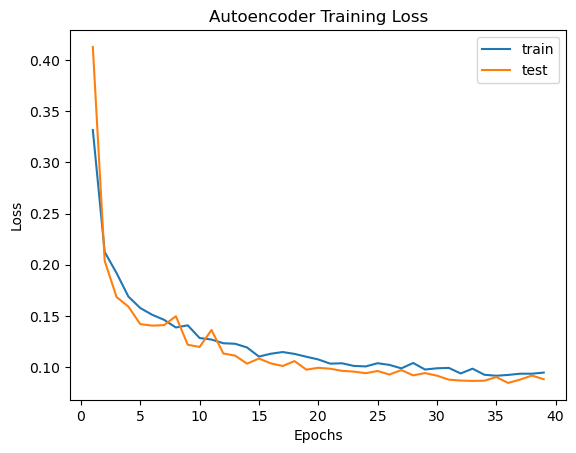

In [12]:
# Plot loss curves
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'], label="train")
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['val_loss'], label="test")
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.show()

In [13]:
# Save Encoder model
encoder = Model(inputs=inp, outputs=Encoderoutput)
encoder.compile()
if os.path.exists('encoder_v2.keras'):
    os.remove('encoder_v2.keras')  # Deletes the existing file
encoder.save('encoder_v2.keras')

In [14]:

# Visualize Encoder model architecture
plot_model(encoder, 'encoder_compress_v2.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [15]:
# Load Encoder model for feature extraction
feature_extract = load_model('encoder_v2.keras')
X_train_encoded = feature_extract.predict(X_train)
X_test_encoded = feature_extract.predict(X_test)

16/16 [==============================] - 0s 3ms/step


In [32]:
gaussian = GaussianNB()
for i in range(100):
    gaussian.fit(X_train, y_train)
    print("Epoch: ",i )

y_pred = gaussian.predict(X_test)

print("Accuracy: %.2f%%" %(100*accuracy_score(y_test, y_pred)))

Epoch:  0
Epoch:  1
Epoch:  2
Epoch:  3
Epoch:  4
Epoch:  5
Epoch:  6
Epoch:  7
Epoch:  8
Epoch:  9
Epoch:  10
Epoch:  11
Epoch:  12
Epoch:  13
Epoch:  14
Epoch:  15
Epoch:  16
Epoch:  17
Epoch:  18
Epoch:  19
Epoch:  20
Epoch:  21
Epoch:  22
Epoch:  23
Epoch:  24
Epoch:  25
Epoch:  26
Epoch:  27
Epoch:  28
Epoch:  29
Epoch:  30
Epoch:  31
Epoch:  32
Epoch:  33
Epoch:  34
Epoch:  35
Epoch:  36
Epoch:  37
Epoch:  38
Epoch:  39
Epoch:  40
Epoch:  41
Epoch:  42
Epoch:  43
Epoch:  44
Epoch:  45
Epoch:  46
Epoch:  47
Epoch:  48
Epoch:  49
Epoch:  50
Epoch:  51
Epoch:  52
Epoch:  53
Epoch:  54
Epoch:  55
Epoch:  56
Epoch:  57
Epoch:  58
Epoch:  59
Epoch:  60
Epoch:  61
Epoch:  62
Epoch:  63
Epoch:  64
Epoch:  65
Epoch:  66
Epoch:  67
Epoch:  68
Epoch:  69
Epoch:  70
Epoch:  71
Epoch:  72
Epoch:  73
Epoch:  74
Epoch:  75
Epoch:  76
Epoch:  77
Epoch:  78
Epoch:  79
Epoch:  80
Epoch:  81
Epoch:  82
Epoch:  83
Epoch:  84
Epoch:  85
Epoch:  86
Epoch:  87
Epoch:  88
Epoch:  89
Epoch:  90
Epoch:  9

In [35]:
# Train Gaussian Naive Bayes classifier on encoded data
gaussian_v2 = GaussianNB()
gaussian_v2.fit(X_train_encoded, y_train)
y_pred_v2 = gaussian_v2.predict(X_test_encoded)

In [36]:
# Evaluate Gaussian Naive Bayes classifier
accuracy_nb = accuracy_score(y_test, y_pred_v2)
print("Gaussian Naive Bayes Accuracy:", accuracy_nb)

Gaussian Naive Bayes Accuracy: 0.768


In [37]:
# Train Logistic Regression classifier on original data
model_lr_original = LogisticRegression(multi_class="ovr")
model_lr_original.fit(X_train, y_train)
yhat_lr_original = model_lr_original.predict(X_test)
accuracy_lr_original = accuracy_score(y_test, yhat_lr_original)
print("Logistic Regression (Original data) Accuracy:", accuracy_lr_original)

d:\anaconda\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (Original data) Accuracy: 0.792


In [38]:
# Train Logistic Regression classifier on encoded data
model_lr_encoded = LogisticRegression(multi_class="ovr")
model_lr_encoded.fit(X_train_encoded, y_train)
yhat_lr_encoded = model_lr_encoded.predict(X_test_encoded)
accuracy_lr_encoded = accuracy_score(y_test, yhat_lr_encoded)
print("Logistic Regression (Encoded data) Accuracy:", accuracy_lr_encoded)

d:\anaconda\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression (Encoded data) Accuracy: 0.83


In [39]:
from sklearn.metrics import precision_score, f1_score

# Calculate Precision and F1 score for Gaussian Naive Bayes on encoded data
precision_nb_encoded = precision_score(y_test, y_pred_v2, average='weighted')
f1_nb_encoded = f1_score(y_test, y_pred_v2, average='weighted')

print("Gaussian Naive Bayes (Encoded data):")
print(f"Precision: {precision_nb_encoded:.4f}")
print(f"F1 Score: {f1_nb_encoded:.4f}")

# Calculate Precision and F1 score for Logistic Regression on encoded data
precision_lr_encoded = precision_score(y_test, yhat_lr_encoded, average='weighted')
f1_lr_encoded = f1_score(y_test, yhat_lr_encoded, average='weighted')

print("\nLogistic Regression (Encoded data):")
print(f"Precision: {precision_lr_encoded:.4f}")
print(f"F1 Score: {f1_lr_encoded:.4f}")


Gaussian Naive Bayes (Encoded data):
Precision: 0.7687
F1 Score: 0.7587

Logistic Regression (Encoded data):
Precision: 0.8284
F1 Score: 0.8274


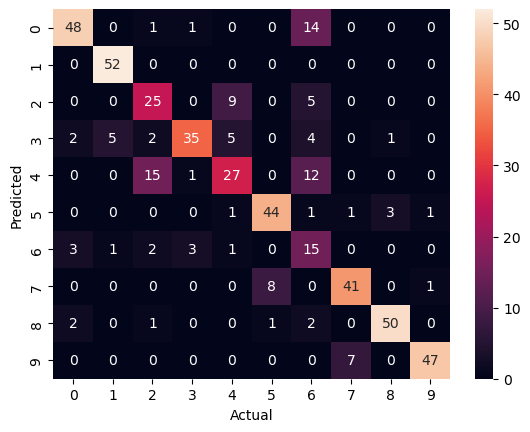

In [29]:
confusion_matrix(y_test, y_pred_v2)

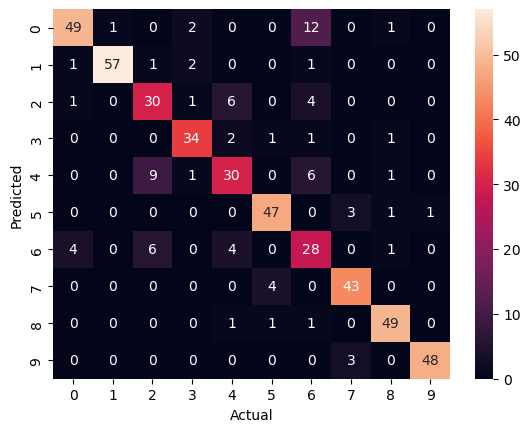

In [30]:

confusion_matrix(y_test, yhat_lr_encoded)